# Q4 Shoulders of Giants (15 points)
As we have already seen, deep networks can sometimes be hard to optimize. Often times they heavily overfit on small training sets. Many approaches have been proposed to counter this, eg, [Krahenbuhl et al. (ICLR’16)](http://arxiv.org/pdf/1511.06856.pdf), self-supervised learning, etc. However, the most effective approach remains pre-training the network on large, well-labeled supervised datasets such as ImageNet. 

While training on the full ImageNet data is beyond the scope of this assignment, people have already trained many popular/standard models and released them online. In this task, we will initialize a ResNet-18 model with pre-trained ImageNet weights (from `torchvision`), and finetune the network for PASCAL classification.

## 4.1 Load Pre-trained Model (7 pts)\
Load the pre-trained weights up to the second last layer, and initialize last layer from scratch (the very last layer that outputs the classes).

The model loading mechanism is based on names of the weights. It is easy to load pretrained models from `torchvision.models`, even when your model uses different names for weights. Please briefly explain how to load the weights correctly if the names do not match ([hint](https://discuss.pytorch.org/t/loading-weights-from-pretrained-model-with-different-module-names/11841)).

**YOUR ANSWER HERE**

First I loaded the resnet with pretrained=True, then i itertated through the state_dict of pretrained resnet and my resnet(with last layer Linear(512, 20)) and assigned the weights of pretrained model to my resnet until the fcn layer is reached.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset
from resnet import ResNet

# Pre-trained weights up to second-to-last layer
# final layers should be initialized from scratch!
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        org_resnet = models.resnet18(True)
        pretrained_weights = org_resnet.state_dict()
        self.resnet = ResNet()
        new = list(pretrained_weights.items())
        my_resnet_kvpair = self.resnet.state_dict()
        count  = 0
        for key, value in my_resnet_kvpair.items():
            layer_name, weights = new[count]
            if layer_name == 'fc.weight':
                break
            my_resnet_kvpair[key] = weights
            count += 1
        self.resnet.load_state_dict(my_resnet_kvpair)

    def forward(self, x):
        return self.resnet(x)

Train the model with a similar hyperparameter setup as in the scratch case. No need to freeze the loaded weights. Show the learning curves (training loss, testing MAP) for 10 epochs. Please evaluate your model to calculate the MAP on the testing dataset every 100 iterations. Also feel free to tune the hyperparameters to improve performance.

**REMEMBER TO SAVE MODEL AT END OF TRAINING**

In [2]:
args = ARGS(batch_size=32, epochs=10, lr=0.001, save_at_end=True, \
            save_freq=10, use_cuda=True, val_every=100, gamma=0.5, step_size=2, log_every=100)
model = PretrainedResNet()
optimizer = torch.optim.Adam(model.parameters(), args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, 'resnet18_pretrained')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.756878
Train Epoch: 0 [100 (64%)]	Loss: 0.150994
Train Epoch: 1 [200 (27%)]	Loss: 0.133344
Train Epoch: 1 [300 (91%)]	Loss: 0.150230
Train Epoch: 2 [400 (55%)]	Loss: 0.097301
Train Epoch: 3 [500 (18%)]	Loss: 0.057413
Train Epoch: 3 [600 (82%)]	Loss: 0.071729
Train Epoch: 4 [700 (46%)]	Loss: 0.049825
Train Epoch: 5 [800 (10%)]	Loss: 0.052487
Train Epoch: 5 [900 (73%)]	Loss: 0.040857
Train Epoch: 6 [1000 (37%)]	Loss: 0.021818
Train Epoch: 7 [1100 (1%)]	Loss: 0.017224
Train Epoch: 7 [1200 (64%)]	Loss: 0.015167
Train Epoch: 8 [1300 (28%)]	Loss: 0.017226
Train Epoch: 8 [1400 (92%)]	Loss: 0.008600
Train Epoch: 9 [1500 (55%)]	Loss: 0.007446
test map: 0.7485116851892839


**YOUR TENSORBOARD SCREENSHOTS HERE**

### Test map vs iteration
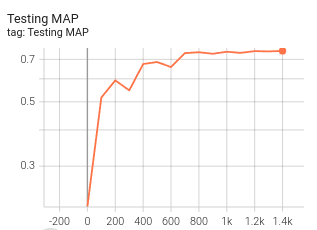

### Train loss vs iteration
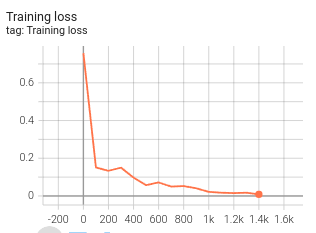

### lr vs iteration
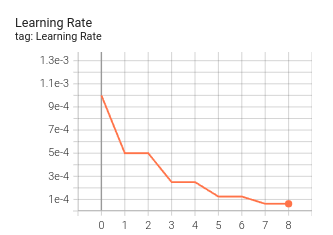

### layer1.1.conv.1.weight
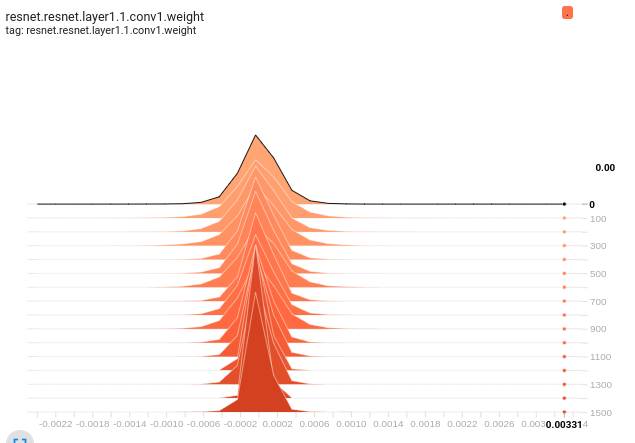

### layer4.0.bn2.bias
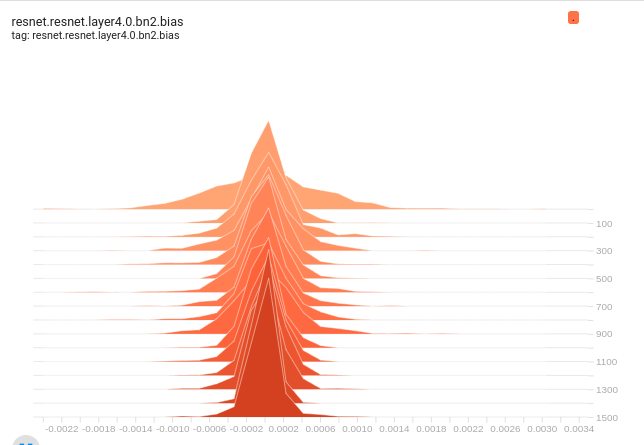